# Analyzing House Sales Data with Python

### Avery Jan  

### 2-16-2023

***
# Overview

This project is about the analysis of a dataset that contains the house sales data in King County, USA. The project consists of five sections: 

(1) Importing the dataset: importing the dataset in a csv file format, converting it to a Pandas dataframe, checking the data types, and generating a short statistical summary of the dataset 

(2) Data Wrangling- removing unneeded columns from the dataframe, searching for the columns containing missing values, and replacing missing values with the means of their columns 

(3) Exploratory Data Analysis: carrying out correlation analysis with respect to the target variable 'price' to select features for fitting models, conducting pairwise correlation analysis to detect multicollinearity, visualizing the only feature that has binary values, and summarizing the types of houses by total number of floors) 

(4) Model Development: using a single feature to fit simple linear regressing models (SLR), using multiple features to fit a multiple linear regression model (MLR), transforming a single feature to fit a polynomial regression model (PR), and transforming multiple features to fit a multivariate polynomial regression model (MPR) 

(5) Model Evaluation and Refinement: evaluating the overfitting of MLR and MPR Models using training and testing data (out-of-sample validation, sample size = 0.15), performing Ridge regression on transformed multiple features using the same split data, determine the effects of Ridge Regression on the R^2 values (calculated from training and testing data) and the coefficients of transformed predictors. 

The overall comparison of model performance is made on cross-validated models while the studies on overfitting models and the effects of Ridge Regression on models are completed on out-of-sample validated models. R^2 value is the measure for assessing the performance of a model. Visualization tools such as box plot, heatmap, regression plots, residual plot, and bar plots are used to support the analyses throughout the project. At the end, key points derived from the last four sections of this project are included. 


## Dataset

This dataset contains house sale prices for King County, which includes Seattle, USA. It includes homes sold between May 2014 and May 2015.
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [1]:
# Import required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

 
 # 1. Importing Dataset
 

In [2]:
# Load the csv file stored in the same directory as this ipynb file into a dataframe.
df=pd.read_csv('kc_house_data_NaN.csv')

In [3]:
# Display the dataframe to have a quick view of the dataset and to find the number of data in the dataset, i. e. 
# the number of rows in dataframe, df. 
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# Display the data types of each column in the dataframe to check if there are any column needs to change its data type. 
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Get a statistical summary of the data.
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Summary (Importing Dataset)

1. A house sales dataset in the csv format was imported and loaded to a dataframe
2. The data type of all columns were checked. They all have an appropriate data type. 
3. A brief statistic summary of the dataset was acquired. The average price of homes is 549,988 dollars, the price at first quartile is 321,950 dollars, and the price at third quartile is 645,000 dollars. These prices will be used to check whether the prices predicted by a model make sense or not during the upcoming model development. 


# 2. Data Wrangling


## Introduction:
Because the focus of this project is to find models that can predict the price of a house in King County, this section includes those tasks on getting the dataframe ready for the model development. Data wrangling tasks performed in this section are: (1) Drop the columns of which the values are not logically related to the target feature, 'price.' (2) Use a for loop to check all columns for missing values (3) Identify the columns containing missing values (4) Calculate the means of those columns and replace missing values with these means.       

In [6]:
# Drop columns "id" and "Unnamed: 0" from the "df" dataframe.
df.drop(["id", "Unnamed: 0"], axis = 1, inplace=True)

# Get a statistical summary of the dataset to confirm that the two columns have been dropped. 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Check if any of the columns contains missing values. 

for column in df.columns.values.tolist():
    print(column)
    print(df[column].isnull().value_counts())
    print("")

date
False    21613
Name: date, dtype: int64

price
False    21613
Name: price, dtype: int64

bedrooms
False    21600
True        13
Name: bedrooms, dtype: int64

bathrooms
False    21603
True        10
Name: bathrooms, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64

sqft_lot
False    21613
Name: sqft_lot, dtype: int64

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

view
False    21613
Name: view, dtype: int64

condition
False    21613
Name: condition, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_above
False    21613
Name: sqft_above, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

yr_built
False    21613
Name: yr_built, dtype: int64

yr_renovated
False    21613
Name: yr_renovated, dtype: int64

zipcode
False    21613
Name: zipcode, dtype: int64

lat
False    21613
Name: lat, dtype: int64

long
False    21613
Name: long, dtype: int64

sqft_living15


In [8]:
# List the information of the two columns that have missing values. 

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [9]:
# Find the mean of the column "bedrooms."
mean=df['bedrooms'].mean()

# Replace the missing values of the column 'bedrooms' with the mean of this column.
# Set the inplace parameter to True to ensure the changes are made in the dataframe.
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [10]:
# Find the mean of the column "bathrooms."
mean=df['bathrooms'].mean()

# Replace the missing values of the column 'bathrooms' with the mean of this column. 
# Set the inplace parameter to True to ensure the changes are made in the dataframe.
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [11]:
# Confirm that neither of these columns,'bedrooms' and 'bathrooms' contains missing values now.

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


## Summary (Data Wrangling)

1. Two columns ,'id' and 'Unnamed: 0', that could interfere with/complicate data analysis later were dropped from the dataframe first.
2. Then, a search for columns containing missing values was performed on the dataframe. Two columns, 'bedrooms' and 'bathrooms' were found to have missing values in them. 
3. The means of these two columns were calculated, and all missing values were replaced with their respective means.


# 3. Exploratory Data Analysis


## Introduction

In this section, first, a correlation analysis with respect to 'price' (the target variable) is undertaken to determine how much each feature of a home correlates with 'price'. Then, a correlation analysis of the entire dataset was performed to view pairwise correlations between pairs of features. A heatmap of this analysis is created to help visualize the number of moderate to strong pairwise correlations. This gives clues about multicollinearity of features contained in this dataset. Along with the correlation analyses, regplots of selective features are created to view the relationship between features. In addition, a boxplot is made to compare the price of homes with or without a waterfront view, the only feature having binary values (0 = does not have a waterfront view and 1 = has a waterfront view). Finally, to learn what types of homes are more common in this area, each type of homes are counted based on the total number of floors they have. 

## Correlation Analysis with respect to the target variable 'price'

In [12]:
# Determine the correlation bewteen a feature of the house and 'price' using the corr() method in Pandas.
# Sort the correlation coefficents in descending order. 

df.corr()['price'].round(3).sort_values(ascending = False)

price            1.000
sqft_living      0.702
grade            0.667
sqft_above       0.606
sqft_living15    0.585
bathrooms        0.526
view             0.397
sqft_basement    0.324
bedrooms         0.309
lat              0.307
waterfront       0.266
floors           0.257
yr_renovated     0.126
sqft_lot         0.090
sqft_lot15       0.082
yr_built         0.054
condition        0.036
long             0.022
zipcode         -0.053
Name: price, dtype: float64

Text(0.5, 1.0, 'price vs. sqft_living')

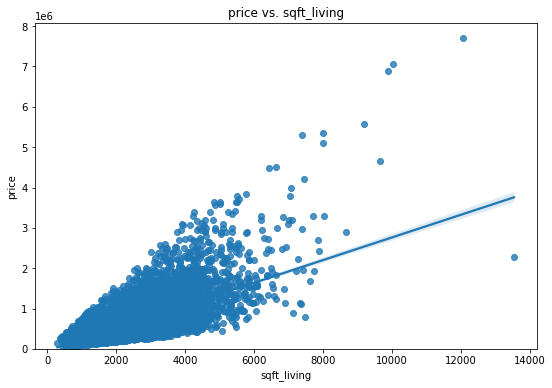

In [13]:
# Visualize the relationship between 'sqft_living' (the most correlated feature) and 'price.'
plt.figure(figsize = (9,6))
sns.regplot(x = 'sqft_living', y = 'price', data = df)
plt.ylim(0,)
plt.title('price vs. sqft_living')

## Correlation Analysis (Pairwise Correlation)

In [14]:
# Run a correlation analysis on all features to view pairwise correlation. 

df.corr().round(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000,0.309,0.526,0.702,0.090,0.257,0.266,0.397,0.036,0.667,0.606,0.324,0.054,0.126,-0.053,0.307,0.022,0.585,0.082
bedrooms,0.309,1.000,0.514,0.578,0.032,0.178,-0.007,0.080,0.027,0.357,0.479,0.303,0.156,0.018,-0.154,-0.010,0.131,0.393,0.030
bathrooms,0.526,0.514,1.000,0.755,0.088,0.502,0.064,0.188,-0.126,0.665,0.686,0.283,0.507,0.051,-0.205,0.024,0.225,0.569,0.088
sqft_living,0.702,0.578,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.318,0.055,-0.199,0.053,0.240,0.756,0.183
sqft_lot,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.114,0.184,0.015,0.053,0.008,-0.130,-0.086,0.230,0.145,0.719
floors,0.257,0.178,0.502,0.354,-0.005,1.000,0.024,0.029,-0.264,0.458,0.524,-0.246,0.489,0.006,-0.059,0.050,0.125,0.280,-0.011
waterfront,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.026,0.093,0.030,-0.014,-0.042,0.086,0.031
view,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,-0.053,0.104,0.085,0.006,-0.078,0.280,0.073
condition,0.036,0.027,-0.126,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.145,-0.158,0.174,-0.361,-0.061,0.003,-0.015,-0.107,-0.093,-0.003
grade,0.667,0.357,0.665,0.763,0.114,0.458,0.083,0.251,-0.145,1.000,0.756,0.168,0.447,0.014,-0.185,0.114,0.198,0.713,0.119


<AxesSubplot:>

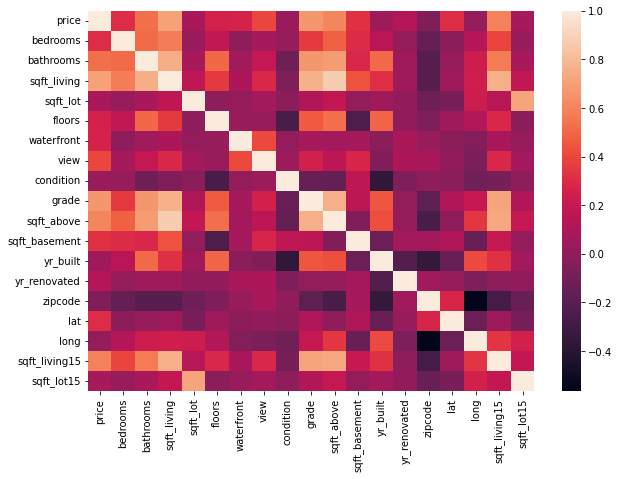

In [15]:
# Create a heatmap to spot moderate to strong correlations between pairs of features. 
corr_matrix = df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(data= corr_matrix)

## Multicollinearity 

Since features in many pairwise correlations moderately or strongly correlate with one another (correlation coefficient > 0.5), when these features are used in fitting models, multicollinearity could affect the performance of the models. To give an example of the strength of these pairwise correlations, a correlation analysis with respect to 'sqft_living' is performed below. This feature is chosen because it is the feature correlating with 'price' the most, and thus, will definitely be used to fit models later on. 

### Correlation Analysis with respect to 'sqft_living' (the feature correlating with 'price' the most)

In [16]:
# Run a correlation analysis with respect to 'sqft_living', the feature correlating with 'price' the most,
# to learn how it correlates with other features.

df.corr()['sqft_living'].round(3).sort_values(ascending = False)

sqft_living      1.000
sqft_above       0.877
grade            0.763
sqft_living15    0.756
bathrooms        0.755
price            0.702
bedrooms         0.578
sqft_basement    0.435
floors           0.354
yr_built         0.318
view             0.285
long             0.240
sqft_lot15       0.183
sqft_lot         0.173
waterfront       0.104
yr_renovated     0.055
lat              0.053
condition       -0.059
zipcode         -0.199
Name: sqft_living, dtype: float64

Text(0.5, 1.0, 'sqft_living vs. sqft_above')

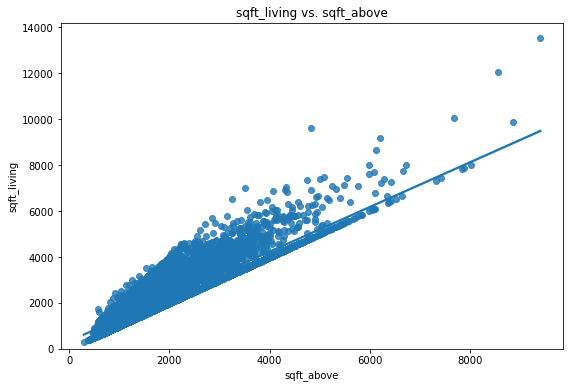

In [17]:
# Visualize the relationship between 'sqft_living' and 'sqft_above', because 'sqft_above' correlates with 'sqft_living' 
# the most.  

plt.figure(figsize = (9,6))
sns.regplot(x = 'sqft_above', y = 'sqft_living', data = df)
plt.ylim(0,)
plt.title('sqft_living vs. sqft_above')

## More Data Analyses on 'waterfront' and 'floors'

Text(0.5, 1.0, 'price vs. waterfront')

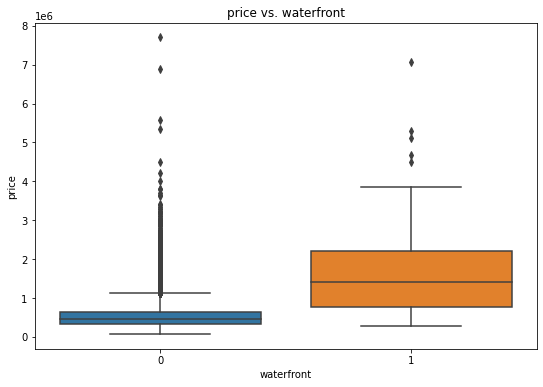

In [18]:
# Use boxplot to visualize the range, mean, and outliers of the prices of houses that have a waterfront view ('1')...
# versus those that don't have a waterfront view ('0'). 

plt.figure(figsize = (9,6))
sns.boxplot(x="waterfront", y="price", data=df)
plt.title('price vs. waterfront')

In [19]:
# Count the number of houses with unique floor values.
floors_counts = df['floors'].value_counts().to_frame()

# Making the output dataframe, floors_counts, more readable by giving the columns more descriptive names. 
# Rename the column 'floor' to value_counts.
floors_counts.rename(columns = {'floors':'value_counts'}, inplace = True)

# Name the index column'floors'. 
floors_counts.index.name = 'floors'

# Display the dataframe, floors_counts
floors_counts

,value_counts
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## Summary (Exploratory Data Analysis)

1. From the correlation analysis with respect to the target variable 'price,' eleven features correlate with 'price' ( correlation coefficients > 0.25). The feature 'sqft_living' is the feature correlated with 'price' the most.
2. The regplot of 'price' vs. 'sqft_living' exhibits an "approximately" linear relationship between them with many data points scattering far above or far below the regression line. This is not surprising because in spite of being the most correlated feature with 'price', 'sqft_living' only has a correlation coefficient of 0.70, a moderate correlation.
3. The heatmap of the correlation analysis with regard to 'price' shows quite a few strong to moderate pairwise correlations.
4. The correlation analysis with respect to the feature 'sqft_living' reveals that this feature has strong pairwise correlations with four other features (correlation coefficients > 0.75). This means that problems encountered when fitting models due to multicollinearity need to be corrected when refining the models. 
5. One of the strong pairwise correlation is between 'sqft_living' and 'sqft_above.' The correlation coefficient is high, 0.876. The regplot of 'sqft_living' vs. 'sqft_above' displays a roughly linear relationship between them. Strong pairwise correlations like this further support the need for addressing the issues relating to multicollinearity when these features are used to fit models. 
6. The boxplot of 'waterfront' shows that on average, homes with a waterfront view are sold at a higher price than those without a waterfront view. In addition, homes with a waterfront view has a wider price range than those without a waterfront view. This might be because additional features that help lift the price of homes with a waterfront view could vary wildly. 
7. The value counts of homes by their total number of floors disclose that homes in this area are mostly one-story and two-story homes. 


# 4. Model Development


 ## Introduction
 
In this section, first, two Simple Linear Regression Models (SLR Models) are developed for comparison, one fitted with 'long' and the other fitted with 'sqft_living,' respectively. The feature 'long' does not correlate with 'price because its correlation coefficient = 0.022 is too low to have a relationship with 'price.' A correlation coefficient < 0.25 means no relationship between the two features. In contrast, the feature 'sqft_living' has the highest correlation coefficient (0.702) of all features with 'price,' but its relationship with 'price' is only moderate (because correlation coefficient < 0.75). In addition a residual plot of 'price' versus 'sqft_living' is made, and it shows a curvilinear relationship between the two, rather than a linear relationship. The discovery of curvilinear relationship between 'sqft_living' and 'price' means that a Polynomial Regression Model (PR Model) of 'sqft_living' is a better model than the linear model. So, a Polynomial Regression Model of 'sqft_living' is created. This marks the end of one-feature models. Next, all eleven features that have either a weak or moderate relationship with 'price, are used to fit more models. These features have correlation coefficients > 0.25. First, a Multiple Linear Regression Model (MLR Model) is fitted with these features. Next, considering that multicollinearity exists among these features (see the Exploratory Data Analysis section), some of the remaining ten features (excluding 'sqft_living') could also have a curvilinear relationship with 'price', just like 'sqft_living' does. Hence, a Multivariate Polynomial Regression Model (MPR Model) is fitted with these eleven features as well. The degree of Polynomial Transformation is set at 2 (so, second-order polynomial transformation). All models are validated by cross validation with four folds. The mean of the R^2 values of the four folds represents the performance of the model. The R^2 value of each fold is calculated using the method "cross_val_score" and the predicted values of 'price' is calculated using the method "cross_val_predict." Both methods are imported from the "sklearn.model_selection module."

## (1) Simple Linear Regression Models (SLR Model, feature = 'long')

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [21]:
# Fit a Simple linear Regression Model using the feature, 'long' (longitude), a feature uncorrelated with 'price.'
# The correlation coefficient is 0.022 (< 0.25, so, no relationship).

lm_long = LinearRegression()

# Cross validation of the model
Rcross_lm_long = cross_val_score(lm_long, df[['long']], df['price'], cv=4)
Rcross_lm_long

array([-0.00018299, -0.00197441, -0.00016301, -0.00442139])

In [22]:
# Get the mean of the R^2 values of the four folds and the standard deviation.
 
print("Mean R^2 (SLR Model, 'long'): ", (Rcross_lm_long.mean()).round(5), "\nStandard deviation of R^2 values:",\
      (Rcross_lm_long.std()).round(5))

Mean R^2 (SLR Model, 'long'):  -0.00169 
Standard deviation of R^2 values: 0.00174


## What's Next?

Since 'long' and 'price' are not correlated, the SLR model fitted with 'long' has a R^2 value of -0.00168 (nearly 0.0), meaning that the model cannot explain the observed data. Hence, next, 'sqft_living,' the feature correlating with 'price' the most, will be used as the predictor to fit a SLR model for predicting the price of a home. 

## (2) Simple Linear Regression Model (SLR Model, feature = 'sqft_living')

In [23]:
# Fit a Simple linear Regression model (a SLR model) using the feature 'sqft_living' most correlating with 'price'. 
# The correlation coefficient is 0.70.

lm_sqft_living = LinearRegression()

# Cross validation of the model
Rcross_lm_sqft_living = cross_val_score(lm_sqft_living, df[['sqft_living']], df['price'], cv=4)
Rcross_lm_sqft_living

array([0.48405393, 0.49342812, 0.4945384 , 0.49661067])

In [24]:
# Get the mean of the R^2 values of the four folds and the standard deviation.
print("Mean R^2 (SLR Model, 'sqft_living'): ", (Rcross_lm_sqft_living.mean()).round(5),\
      "\nStandard deviation of R^2 values:", (Rcross_lm_sqft_living.std()).round(5))
print()

# Get the predicted values of 'price.'
yhat_sqft_living = cross_val_predict(lm_sqft_living, df[['sqft_living']], df['price'], cv=4)

print("The predicted values are:" + str(yhat_sqft_living))
print()

Mean R^2 (SLR Model, 'sqft_living'):  0.49216 
Standard deviation of R^2 values: 0.00482

The predicted values are:[289097.80337707 676049.91415716 174960.84983762 ... 240052.48976191
 404620.6062075  240052.48976191]



## What's Next?

The SLR Model of sqft_living explains a little less than half of the observed data. To have a model with a better performance, it is necessary to determine if the next step is fitting a polynomial regression model of this feature or another linear regression model using additional features. To make this determination, first, a residual plot of 'price' vs. 'sqft_living' needs to be created to substantiate whether the presumption of a linear relationship between 'price' and 'sqft_living' holds true or not.  If this presumption is not true, then a polynomial regression model should be fitted to see if performing polynomial regression on the feature will yield a better model.  

## (3) Curvilinear Relationship with 'price'

### Residual Plot ('price' vs. 'sqft_living') 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

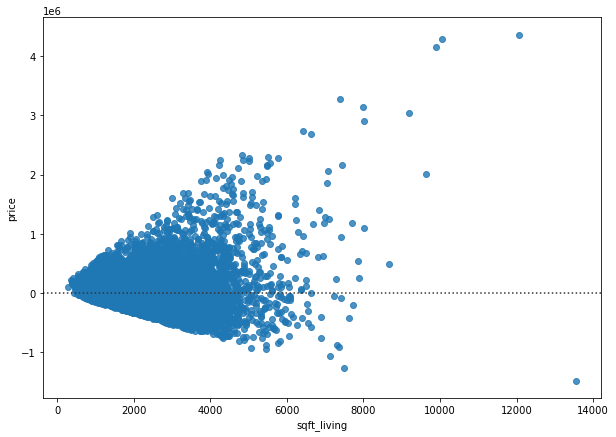

In [25]:
# Generate the residual plot of 'sqft_living' to check whether the residuals randomly spread around the x-axis or not. 
plt.figure(figsize = (10,7))
sns.residplot(data = df, x=df['sqft_living'], y=df['price'])

### What's Next? 

The residual on the plot of 'price' vs. 'sqft_living' displays a cone-shaped pattern, not randomly spread out around the line of 'price'  = 0. This infers that the relationship  between 'sqft_living' and 'price' is curvilinear, not linear as initially proposed. Thus, the SLR model with 'sqft_living' as the predictor is not an appropriate model for predicting the price of a home and a Second-order Polynomial Regression Model (a PR model) needs to be fitted with 'sqft_living' next.  

## (4) Polynomial Regression Model (PR Model, feature = 'sqft_living')

In [26]:
# A Polynomial Regerssion Model (degree = 2) using 'sqft_living' as the predictor. 

# Pipeline is used to fit this Polynomial Regression Model as well as a Multidimensional PR Model later. 

# Create a list of tuples to be used as the input parameter of a the pipeline object.
# The first element in each tuple contains the name of the estimator (e.g. 'scale' in the first tuple).
# The second element in each tuple contians the model constructor (e.g. 'StandardScaler()' in the frst tuple)

# The steps included  the pipeline are: 
# (1) Normalize the data - StandardScaler()
# (2) Perform polynomial transformation on the data - PolynomialFeatures(), default degree = 2
# (3) Fit a linera Regression Model - LinearRegression()

Input=[('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# Use the list of tuples "Input" to create a pipeline object.
pr_sqft_living = Pipeline(Input)

# Cross validation of the model
Rcross_pr_sqft_living = cross_val_score(pr_sqft_living, df[['sqft_living']], df['price'], cv=4)
Rcross_pr_sqft_living

array([0.54422523, 0.56825012, 0.43554832, 0.52764714])

In [27]:
# Get the mean of the R^2 values of the four folds and the standard deviation.
print("Mean R^2 (Second-order, 'sqft_living', PR Model): ", (Rcross_pr_sqft_living.mean()).round(5),\
      "\nStandard deviation of R^2 values:", (Rcross_pr_sqft_living.std()).round(5))
print()

# Get the predicted values of 'price.'
yhat_pr_sqft_living = cross_val_predict(pr_sqft_living, df[['sqft_living']], df['price'], cv=4)

print("The predicted values are:" + str(yhat_pr_sqft_living))
print()

Mean R^2 (Second-order, 'sqft_living', PR Model):  0.51892 
Standard deviation of R^2 values: 0.05025

The predicted values are:[328434.44476406 634290.1872233  262779.62971484 ... 305948.92094559
 406117.98539705 305948.92094559]



## What's Next?

When using 'sqft_living as the sole predictor, the mean R^2 value of the PR Model is 0.5189, which is only a little improvement from the mean R^2 value of its SLR Model (0.4921). Therefore, it is safe to say that regardless of the type of the model, one feature alone is insufficient to fit a decent model for predicting the price of a home. Thus, next, all eleven features weakly or moderately correlating with 'price' are used to two models, a Multiple Linear Regression Model (MLR Model) and a Multivariate Polynomial Regression Model (MPR Model, degree = 2). 

## (5) Multiple Linear Regression Model (MLR Model, 11 Features) 

In [28]:
# A Multiple Linear Regression model (a MLR model) with eleven features correlating with 'price' 

# Create a list of the 11 features that have correlation coefficients > 0.25 to serve as the input for training the model.
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15",\
           "sqft_above","grade","sqft_living"] 

# Create a linear regression object.
lm_11 = LinearRegression()

# Cross validation of the model and get the R^2 values of the folds. 
Rcross_lm_11 = cross_val_score(lm_11, df[features], df['price'], cv=4)
Rcross_lm_11

array([0.65014123, 0.64308611, 0.65591784, 0.66821947])

In [29]:
# Get the mean of the R^2 values of the four folds and the standard deviation.
print("Mean R^2 (MLR Model, 11 features): ", (Rcross_lm_11.mean()).round(5), "\nStandard deviation of R^2 values:",\
      (Rcross_lm_11.std()).round(5))
print()

# Get the predicted values of 'price.'
yhat_lm_11 = cross_val_predict(lm_11, df[features], df['price'], cv=4)

print("The predicted values are:" + str(yhat_lm_11))
print()

Mean R^2 (MLR Model, 11 features):  0.65434 
Standard deviation of R^2 values: 0.00921

The predicted values are:[282691.7687217  657039.19625384 303765.11217108 ... 302384.16493312
 419075.37128103 302186.29360281]



## (6) Multivariate Polynomial Regression Model (MPR Model, 11 Features)

In [30]:
# A Second-order Multidimensional Polynomial Regerssion Model (MPR, degree = 2) using 11 features.

# Pipeline is used to fit this Polynomial Regression Model. 
# The steps included  the pipeline are: 
# (1) Normalize the data - StandardScaler()
# (2) Perform polynomial transformation on the data - PolynomialFeatures(), default degree = 2
# (3) Fit a linera Regression Model - LinearRegression()

Input=[('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# Use the list of tuples "Input" to create a pipeline object.
pr_11=Pipeline(Input)

# Cross validation of the model and get the R^2 values of the folds. 
Rcross_pr_11 = cross_val_score(pr_11, df[features], df['price'], cv=4)
Rcross_pr_11

array([0.75283685, 0.73971795, 0.69137814, 0.73531385])

In [31]:
# Get the mean of the R^2 values of the four folds and the standard deviation.
print("Mean R^2 (Second-order, PR Model, 11 features): ", (Rcross_pr_11.mean()).round(5),\
      "\nStandard deviation of R^2 values:", (Rcross_pr_11.std()).round(5))
print()

# Get the predicted values of 'price.'
yhat_pr_11 = cross_val_predict(pr_11, df[features], df['price'], cv=4)

print("The predicted values are:" + str(yhat_pr_11))
print()

Mean R^2 (Second-order, PR Model, 11 features):  0.72981 
Standard deviation of R^2 values: 0.02311

The predicted values are:[350520.         542328.         460120.         ... 449912.30224609
 467580.30224609 449872.30224609]



## (7) Performance of Models (cross-validation, cv = 4)

In [32]:
# Create a dataframe to list the mean R^2 values of all models fitted in this section. 

# Create a series of Lists for the content of the columns in the dataframe. 

# A List for the names of the models
model = ['Simple Linear Regression (SLR) ', 'Simple Linear Regression (SLR)', 'Polynomial Regression (PR)',\
         'Multiple Linear Regression (MLR)', 'Multivariate Polynomial Regression (MPR)']

# A List of features used to fit the models. 
Predictors = ['long', 'sqft_living', 'sqft_living', '11 features', '11 features']
Polynomial_Transform = ['None', 'None', 'Second-order', 'None', 'Second-order']

# A list of the mean R^2 value of each model calculated by cross validation. 
R_squared = [-0.00169, 0.49216, 0.51892, 0.65434, 0.72981]

# Zip all the lists except the list of the names of the models.
list_zip = list(zip(Predictors, Polynomial_Transform, R_squared))

# Create the dataframe with the zipped lists and give each column a descrptive name. 
df_models = pd.DataFrame(list_zip, index = model,\
                         columns = ['Features', 'Polynomial Transform', 'Mean R^2 Value'])

# Give the index of each row a descriptive name. 
df_models.index.name = 'Model (Cross-validation, cv=4)'

df_models

,Features,Polynomial Transform,Mean R^2 Value
"Model (Cross-validation, cv=4)",,,
Simple Linear Regression (SLR),long,None,-0.00169
Simple Linear Regression (SLR),sqft_living,None,0.49216
Polynomial Regression (PR),sqft_living,Second-order,0.51892
Multiple Linear Regression (MLR),11 features,None,0.65434
Multivariate Polynomial Regression (MPR),11 features,Second-order,0.72981


## Summary (Model Development)

The SLR Model fitted with 'long', a feature not correlating with 'price', has a negative R^2 value. This means this SLR Model does not work on the test data at all (https://towardsdatascience.com/explaining-negative-r-squared-17894ca26321). The SLR Model and PR Model fitted with 'sqft_living', the feature correlating with 'price' the most, can only explain about half of the observed data. These outcomes indicate that additional features need to be used to fit a proper model for predicting the price of a home. In indeed, the MLR Model and the MPR Model fitted with the eleven features correlating with 'price' perform much better than those one-feature models. Of all models, the MPR Model is the best performing model so far with a mean R^2 value of 0.72981. Also notice that regardless of the number of predictors of the model, polynomial transform of the predictor(s) seems to always results in a polynomial regression model that performs better than its linear regression peer. This is because features like 'sqft_living' have a curvilinear relationship with 'price.' Despite the fact that all the features correlating with 'price' and applying polynomial transform on them produce better performing models, the complexity of the MLR and MPR models could lead to the consequence of overfitting the models. Whether these two complex models are overfitted or not is explored in the next section. 


# 5. Model Evaluation and Refinement


## Introduction 

This section consists of three parts. In Part A, a MLR Model and MPR Model are fitted with the training data and then validated with the testing data i.e., out-of-sample validation, in an effort to answer the question about whether these two types of models are overfitted or not. In Part B, a Ridge Regression Model with polynomial transform (degree = 2) on the eleven features is fitted and compared with the MPR Model created in Part A to study the effects of Ridge Regression on the performance and the coefficients of the MPR Model. In Part C, two Ridge Regression Models with and without transforming the eleven features (RR_MLR Model and RR_MPR Model) are fitted and validated by cross-validation. Then, their R^2 values are compared with those models cross-validated in the "Model Development" section. 

## Part A. Overfitting MLR and MPR Models?

To begin the study, the data of the eleven features is split into the training set and testing set. The training set is used to fit two models that are more susceptible to overfitting, one without polynomial transformation performed on the training data (MLR_ov Model)  and the other with the transformation (MPR_ov Model). Note that to differentiate the models fitted in this part from those fitted and validated by cross-validation, all models fitted in this section have "ov" (stands for out-of-sample validation) in their names. Once the models are fitted, the R^2 values calculated from both the training data and the testing data are compared to conclude whether these models are overfitted or not.

### (1) Split Data into Traning Dataset and Testing Dataset

In [33]:
# Import the necessary module
from sklearn.model_selection import train_test_split
print("done")

done


In [34]:
# Split the data of those eleven features (correlation coefficients > 0.25) into training and testing datasets. 
# The split will result in 15% of the data being the testing data and 85% of the data being the training data. 
# The outputs of the split are two Dataframes, x_train, x_test and two Series y_train, y_test. 
   
X = df[features]
Y = df['price']

# Samaple Size
print("sample size = " + str(0.15))
print()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# Get the number of testing samples and training samples, respectively. 
print("number of testing data:", x_test.shape[0])
print("number of training data:",x_train.shape[0])

sample size = 0.15

number of testing data: 3242
number of training data: 18371


### (2) MLR_ov Model (11 features, sample size = 0.15, R^2 values: training vs. testing)

In [35]:
# A Multiple Linear Regression Model (a MLR model) fitted with eleven features in the 'features' list 

# Fit a linear regression model to predict the 'price' using the training set.'
lm_11_ov = LinearRegression()
lm_11_ov.fit(x_train, y_train)

# Samaple Size
print("sample size = " + str(0.15))
print()

# Get the predicted values of 'price.'
print("The predicted values are:" + str(lm_11_ov.predict(df[features])))
print()

# Calculate R^2 value of the above linear regression model. 
print("R^2 (training set, MLR_ov Model): " + str(lm_11_ov.score(x_train, y_train).round(5)))
print("R^2 (testing set, MLR_ov Model): " + str(lm_11_ov.score(x_test, y_test).round(5)))

sample size = 0.15

The predicted values are:[283620.42602589 667108.31110124 297802.42648969 ... 305967.00031699
 431229.10221592 305763.6305693 ]

R^2 (training set, MLR_ov Model): 0.65944
R^2 (testing set, MLR_ov Model): 0.64788


### (3) MPR_ov Model (11 features, sample size = 0.15, R^2 values: training vs. testing)

In [36]:
# A second-order Multivariate Polynomial Regerssion Model (degree = 2) fitted with the training set of the 11 features. 

# Pipeline is used to fit this Polynomial Regression Model. 

# Create a list of tuples to be used as the input parameter of a the pipeline object.
# The first element in each tuple contains the name of the estimator (e.g. 'scale' in the first tuple).
# The second element in each tuple contians the model constructor (e.g. 'StandardScaler()' in the frst tuple)

# The steps included  the pipeline are: 
# (1) Normalize the data - StandardScaler()
# (2) Perform polynomial transformation on the data - PolynomialFeatures(), default degree = 2
# (3) Fit a linera Regression Model - LinearRegression()

Input=[('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# Use the list of tuples "Input" to create a pipeline object.
pr_11_ov =Pipeline(Input)

# Fit the polynomial model using the features in the list, "features" and the pipeline object.  
pr_11_ov.fit(x_train, y_train)

# Samaple Size
print("sample size = " + str(0.15))
print()

# Get the predicted values of 'price'
print("The predicted values are:" + str(pr_11_ov.predict(x_train))) 
print()

# Calculate the R^2 value.
print("R^2 (training set, MPR_ov Model): " +\
      str(pr_11_ov.score(x_train, y_train).round(5)))
print("R^2 (testing set, MPR_ov Model): " +\
      str(pr_11_ov.score(x_test, y_test).round(5)))

sample size = 0.15

The predicted values are:[ 341893.25  337321.75  257941.25 ...  612407.5   475113.25 1093577.25]

R^2 (training set, MPR_ov Model): 0.75391
R^2 (testing set, MPR_ov Model): 0.7117


 ### (4) Conclusion on Overfitting MLR and MPR Models

In [37]:
# Create a dataframe that includes the R^2 values of the MLR Model and MPR Model.

# Create lists containing the content of the columns of the dataframe.

# A list for the names of the models
model_ov = ['Multiple Linear Regression (MLR_ov) ', 'Multivariate Polynomial Regression (MPR_ov)']

# A list for the number of features used to fit the models. 
Predictors_ov = ['11 features', '11 features']

# A list for the R^2 values of the training data of the two models
R_squared_tr = [0.65944, 0.75391]   

# A List for the R^2 values of the testing data of the two models
R_squared_ts = [0.64788, 0.71170]

# A list to contain the answers to whether the features underwent Polynomial Transform or not and if they do, 
# the degree of the Polynomial Transform
Polynomial_Transform_ov= ['None','Second-order']  

# A List to contain the difference between the R^2 values of the training data and testing data
R_squared_diff = [(0.65944 - 0.64788), (0.75391 - 0.71170)]

# Zip all the lists except the list for the names of the models. 
list_zip_ov = list(zip(Predictors_ov, Polynomial_Transform_ov, R_squared_tr, R_squared_ts, R_squared_diff))

# Create the dataframe using the zipped lists and give each column an appropriate name. 
df_models_ov = pd.DataFrame(\
                            list_zip_ov, index = model_ov,\
                            columns = ['Features', 'Polynomial Transform','R^2 Value (training)',\
                                       'R^2 Value(testing)', 'Difference, R^2 Value'])

# Give the index of each row an appropriate name.
df_models_ov.index.name = 'Model (sample size = 0.15)'

df_models_ov

,Features,Polynomial Transform,R^2 Value (training),R^2 Value(testing),"Difference, R^2 Value"
Model (sample size = 0.15),,,,,
Multiple Linear Regression (MLR_ov),11 features,None,0.65944,0.64788,0.01156
Multivariate Polynomial Regression (MPR_ov),11 features,Second-order,0.75391,0.71170,0.04221


In either model, the R^2 value calculated with the testing data is only slightly lower than the R^2 value calculated with the training data. This means that in spite of their complexity, neither models is much overfitted. However, as expected, the MPR model, which consists of seventy-seven final predictors as opposed to the eleven predictors in the MLR model, is slightly more overfitted than the MLR Model. Therefore, it is worthwhile to look into how Ridge Regression can be used to alleviate the overfitting of the MPR Model.   

## Part B. Ridge Regression

In this part, Ridge Regression is applied to mitigate the overfitting of the MPR_ov Model as well as the aforementioned multicollinearity (discussed in the "Exploratory Data Analysis" section) among some of the eleven features used to fit the MPR_ov Model. So, like what was done to fit the MPR_ov Model, Second-Order Polynomial Transform is performed on the eleven features prior to Ridge Regression. Once Again, the transform results in seventy-seven predictors for the Ridge Regression Model (RR_MPR_ov Model). Then, the R^2 values and the coefficients of the MPR_ov Model and the RR_MPR_ov Model are compared to show the effects of Ridge Regression on the MPR_ov Model.  

In [38]:
# Import the Ridge module. 

from sklearn.linear_model import Ridge

### (1) Ridge Regression Model with Polynomial Transform  (R^2 values from training data and testing data)

In [39]:
# Create a Ridge Regression Model using Pipeline that includes Polynomial Transform (degree =2) as the 2nd step,
# sample size = 0.15.
 
# Create a list of tuples to be used as the input parameter of a the pipeline object.

# The steps included  the pipeline are: 
# (1) Normalize the data - StandardScaler()
# (2) Perform polynomial transformation on the data - PolynomialFeatures(), default degree = 2
# (3) Fit a Ridge Regression Model - RidgeRegression()

Input=[('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',Ridge(alpha = 0.1))]

# Use the list of tuples "Input" to create a pipeline object.
pr_11_Ridge =Pipeline(Input)

# Fit the Ridge Regression model using the training data. 
pr_11_Ridge.fit(x_train, y_train)

print("Sample size = 0.15")

# Calculate the R^2 value using the training data.
print("R^2 (training set, RR_MPR_ov Model, second-order, alpha = 0.1): " +\
      str(pr_11_Ridge.score(x_train, y_train).round(5)))

# Calculate the R^2 value using the testing data.
print("R^2 (testing set, RR_MPR_ov Model, second-order, alpha = 0.1): " +\
      str(pr_11_Ridge.score(x_test, y_test).round(5)))

Sample size = 0.15
R^2 (training set, RR_MPR_ov Model, second-order, alpha = 0.1): 0.75391
R^2 (testing set, RR_MPR_ov Model, second-order, alpha = 0.1): 0.71173


### (2) Comparing R^2 Values (MPR Model vs. Ridge Regression Model) 

In [40]:
# Create a dataframe containing the R^2 values of the MPR Model and the Ridge Regression Model (sample size = 0.15). 

# Create a series of lists for the content of the columns to be included in the dataframe. 

# A List for the names of the models
model_ov = ['Multivariate Polynomial Regression (MPR_ov)', 'Ridge Regression Model (RR_MPR_ov)']

# A list for the number of features used to fit the models
Predictors_ov = ['11 features', '11 features']

# A list for the types of polynomial transform the features of the models underwent
Polynomial_Transform_ov= ['Second-order','Second-order']

# A list of R^2 values from the training set 
R_squared_tr = [0.75391, 0.75391]

# A list of R^2 values from the training set
R_squared_ts = [0.71170, 0.71173]

# Zip all the lists except the list for the names of the models.   
list_zip_ov = list(zip(Predictors_ov, Polynomial_Transform_ov, R_squared_tr, R_squared_ts))

# Create the dataframe using the zipped lists and give each column an appropriate name. 
df_models_ov = pd.DataFrame(list_zip_ov,index = model_ov,\
                            columns = ['Features', 'Polynomial Transform',\
                                       'R^2 Value (training)', 'R^2 Value(testing)'])

# Give the index of each row an appropriate name.
df_models_ov.index.name = 'Model (sample size = 0.15)'

df_models_ov

,Features,Polynomial Transform,R^2 Value (training),R^2 Value(testing)
Model (sample size = 0.15),,,,
Multivariate Polynomial Regression (MPR_ov),11 features,Second-order,0.75391,0.71170
Ridge Regression Model (RR_MPR_ov),11 features,Second-order,0.75391,0.71173


### Comments on the Effect of Ridge Regression on R^2 Values

Ridge Regression does not alter the R^2 value of calculated from the training data of the MPR_ov Model, but slightly increases the R^2 value calculated from the testing data of that model. That is, Ridge regression only marginally improved the R^2 value calculated from the testing data. So, bar graphs of the coefficients of the RR_MPR_ov Model and the MPR_ov Model are compared to visualize more significant changes made by performing Ridge Regression. 

### (3) Comparing Coefficients (MPR Model vs. Ridge Regression Model)

<AxesSubplot:title={'center':'Coefficients, Multivariate Polynomial Regression Model (MPR_ov Model)        (sample size = 0.15, scale = power of 16)'}>

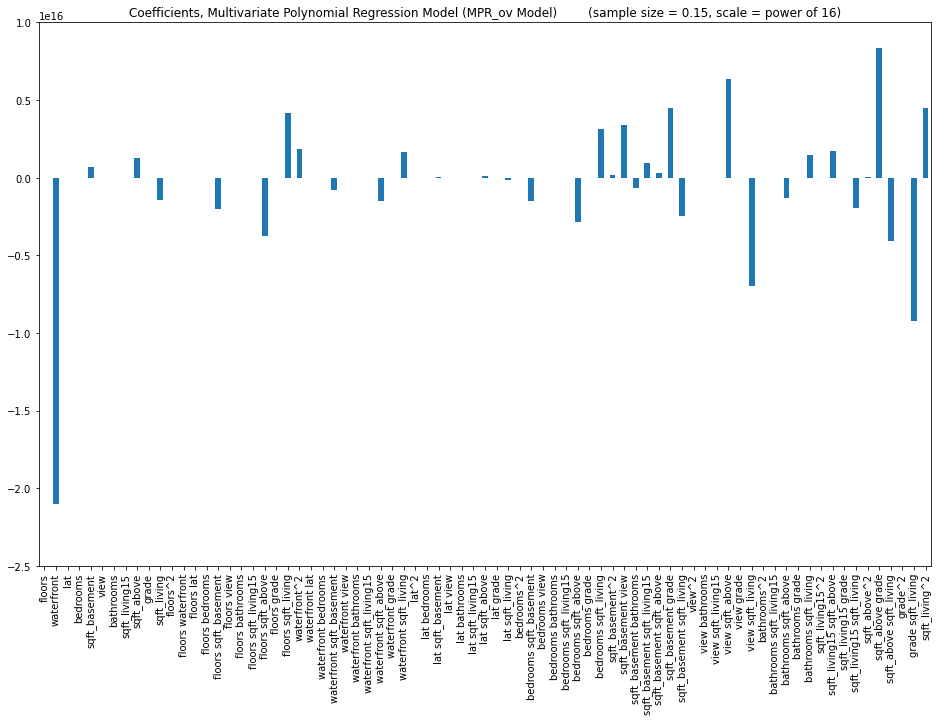

In [41]:
# Plot the coefficients of the Multivariate Polynomial Regression Model (The MPR Model, sample size = 0.15).

# Get the names of the features of the model. 
name_features_pr = pr_11_ov.named_steps['polynomial'].get_feature_names_out(input_features = features)

# Get the coefficients of the features. 
pr_coef = pr_11_ov.named_steps['model'].coef_

# Create a Series of the names of the the features and their coefficients. 
coef3 = pd.Series(pr_coef, name_features_pr)

# Create a bar graph of the coefficents. 
coef3.plot(kind='bar',\
        title='Coefficients, Multivariate Polynomial Regression Model (MPR_ov Model)\
        (sample size = 0.15, scale = power of 16)',\
        ylim = (-2.5e16, 1e16), figsize=(16, 10))

<AxesSubplot:title={'center':'Coefficients, Ridge Regression Model (RR_MPR_ov Model),            (alpha = 0.1, Polynomial Transform, sample size = 0.15, scale = power of 5)'}>

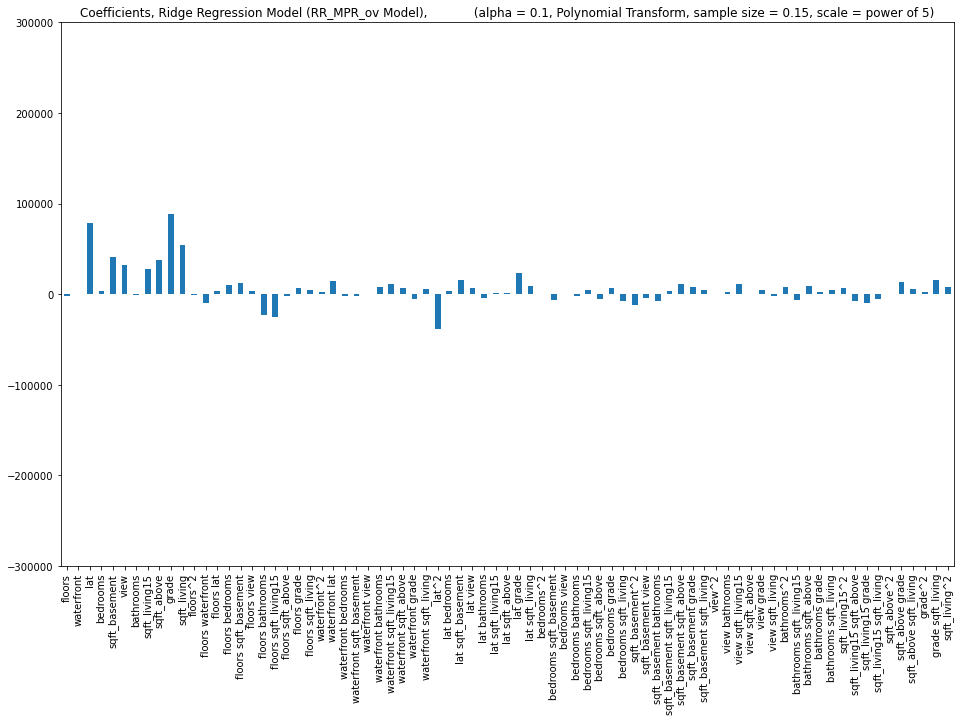

In [42]:
# Plot the coefficients of the Ridge Regression Model (Sample size = 0.15, alpha = 0.1)

# Get the names of the features of the model. 
name_features_rr_pr = pr_11_Ridge.named_steps['polynomial'].get_feature_names_out(input_features = features)

# Get the coefficients of the features. 
rr_pr_coef = pr_11_Ridge.named_steps['model'].coef_

# Create a Series of the names of the the features and their coefficients.
coef4=pd.Series(rr_pr_coef, name_features_rr_pr)

# Create a Series of the names of the the features and their coefficients.
coef4.plot(kind='bar', \
           title= 'Coefficients, Ridge Regression Model (RR_MPR_ov Model), \
           (alpha = 0.1, Polynomial Transform, sample size = 0.15, scale = power of 5)',\
           ylim = (-3e5, 3e5),figsize=(16, 10) )

### Comments on the Effect of Ridge Regression on Coefficients

The comparison of the two bar graphs indicates that Ridge Regression significantly decreases the coefficients of the MPR_ov Model by approximately ten to eleven orders of magnitude. That is, by setting the regularizing parameter (alpha) at 0.1, Ridge Regression attenuates all of the coefficients of the MPR Model to a considerable degree, making the impact that each of the seventy-seven predictors has on the RR_MPR_ov Model much smaller than they did in the MPR_ov Model. This is in sharp contrast to a very small increase of the R^2 value calculated from the testing data (an increase from 0.71170 to 0.71173).

## Part C. Ridge Regression Models (RR_MLR Model and RR_MPR Model) for Comparison

In this part, two more Ridge Regression Models are fitted and validated by cross-validation (RR_MLR Model and RR_MPR Model) for the purpose of comparing their R^2 values with those of other models fitted in the "Model Development" section, . Note that the names of these two models do not contain "ov" because they are cross-validated just like how their peers were validated in the "Model Development" section. Once these two Ridge Regression models are fitted, the R^2 values of all cross-validated models (seven of them) are tabulated in a dataframe for comparison. 

### (1) Ridge Regression Model (RR_MLR Model, 11 features, cross-validation)

In [43]:
# Create a Ridge regression object and set the regularization parameter (alpha) to be 0.1
RidgeModel_lm_cv=Ridge(alpha=0.1)

# Perform cross validation and get the R^2 values of the folds, cv = 4. 
Rcross_rr_lm_11 = cross_val_score(RidgeModel_lm_cv, df[features], df['price'], cv=4)
Rcross_rr_lm_11

array([0.65012549, 0.64308975, 0.65592955, 0.66822354])

In [44]:
# Get the mean of the R^2 values and the standard deviation of the four folds .
print("Mean R^2 (RR Model, 11 features, alpha = 0.1): ", (Rcross_rr_lm_11.mean()).round(5),\
      "\nStandard deviation of R^2 values:",\
      (Rcross_rr_lm_11.std()).round(5))
print()

# Get the predicted values of 'price.'
yhat_rr_lm_11 = cross_val_predict(RidgeModel_lm_cv, df[features], df['price'], cv=4)

print("The predicted values are:" + str(yhat_rr_lm_11))
print()

Mean R^2 (RR Model, 11 features, alpha = 0.1):  0.65434 
Standard deviation of R^2 values: 0.00921

The predicted values are:[282700.23844251 657004.39841602 303718.44875292 ... 302385.45779758
 419081.75174994 302187.65231222]



### (2) Ridge Regression Model with Polynomial Transform (RR_MPR Model, 11 features, cross-validation)

In [45]:
# Create a Ridge Regression Model using Pipeline that includes Polynomail Transform of the features as the 2nd step.

# The steps included  the pipeline are: 
# (1) Normalize the data - StandardScaler()
# (2) Perform polynomial transformation on the data - PolynomialFeatures(), default degree = 2
# (3) Fit a linera Regression Model - LinearRegression()

Input=[('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',Ridge(alpha = 0.1))]

# Use the list of tuples "Input" to create a pipeline object.
pr_11_Ridge_cv=Pipeline(Input)

# Cross validate the model and get the R^2 values of the folds. 
Rcross_pr_11_Ridge_cv = cross_val_score(pr_11_Ridge_cv, df[features], df['price'], cv=4)
Rcross_pr_11_Ridge_cv

array([0.75287555, 0.73974267, 0.69137986, 0.7356803 ])

In [46]:
# Get the mean of the R^2 values and the standard deviation of the four folds.
print("Mean R^2 (Second-order, PR Model, 11 features): ", (Rcross_pr_11_Ridge_cv.mean()).round(5),\
      "\nStandard deviation of R^2 values:", (Rcross_pr_11_Ridge_cv.std()).round(5))
print()

# Get the predicted values of 'price.'
yhat_pr_11_Ridge_cv = cross_val_predict(pr_11_Ridge_cv, df[features], df['price'], cv=4)

print("The predicted values are:" + str(yhat_pr_11_Ridge_cv))
print()

Mean R^2 (Second-order, PR Model, 11 features):  0.72992 
Standard deviation of R^2 values: 0.02314

The predicted values are:[350257.08716575 542303.25169847 460189.17043163 ... 447163.75049544
 464843.29417922 447116.74961082]



### (3) Comparison of All Models (cross-validation, cv = 4)

In [47]:
# Create a dataframe to list the mean R^2 values of all models fitted in this project. 

# Create lists of the models, their predictors, and their order of polynomial transform
model = ['Simple Linear Regression (SLR) ', 'Simple Linear Regression (SLR)', 'Polynomial Regression (PR)',\
         'Multiple Linear Regression (MLR)', 'Multivariate Polynomial Regression (MPR)', 'Ridge Regression (RR_MLR)',\
         'Ridge Regression with Polynomial Transform (RR_MPR)']

Predictors = ['long', 'sqft_living', 'sqft_living', '11 features', '11 features', '11 features', '11 features']
Polynomial_Transform = ['None', 'None', 'Second-order', 'None', 'Second-order', 'None', 'Second-order']

# Create a list of the mean R^2 value of each model calculated by cross validation. 
R_squared = [-0.00168, 0.49215, 0.51891, 0.65434, 0.72981, 0.65434, 0.72992]

list_zip = list(zip(Predictors, Polynomial_Transform, R_squared))

df_models = pd.DataFrame(list_zip, index = model, columns = ['Features', 'Polynomial Transform',\
                                                             'Mean R^2 Value'])
df_models.index.name = 'Model (cross-validation, cv =4)'

df_models

,Features,Polynomial Transform,Mean R^2 Value
"Model (cross-validation, cv =4)",,,
Simple Linear Regression (SLR),long,None,-0.00168
Simple Linear Regression (SLR),sqft_living,None,0.49215
Polynomial Regression (PR),sqft_living,Second-order,0.51891
Multiple Linear Regression (MLR),11 features,None,0.65434
Multivariate Polynomial Regression (MPR),11 features,Second-order,0.72981
Ridge Regression (RR_MLR),11 features,None,0.65434
Ridge Regression with Polynomial Transform (RR_MPR),11 features,Second-order,0.72992


# Key Points

### Data Wrangling

1. Those columns ("id" and "Unnamed: 0" ) can be included in neither data analysis nor model development because despite data type being integer type, they don't possess the meaning of numerical variables. In fact, they serve more like labels for each row of the data. Therefore, it is necessary to remove them from the dataframe first so that they do not interfere with any upcoming data analysis or model development.

2. Missing values cause errors during the process of fitting models. So, it is essential to implement a "for loop" that searches for columns containing missing values. In this project, missing values are found in the columns of 'bedrooms' and 'bathrooms.' Both features (data type = float) are needed to fit most models. So, the missing values are replaced with the means of their respective columns to facilitate the model development. 

### Exploratory Data Analysis

1. To select features for fitting models that predict the price of a home, correlation analysis is performed with regard to the target variable 'price,' and the correlation coefficient is used as indicators of the strength of the relationship between a feature and 'price.' Only those features with correlation coefficients greater than 0.25 i.e., at least weakly correlated with 'price' are used to develop models. This dataset has eleven features of this nature.

2. When using as many as eleven features to fit models, it is important to scrutinize whether there is multicollinearity among these features or not. In this project, the pairwise correlation analysis is performed to detect multicollinearity. It turns out that just 'sqft_living,' alone, it strongly correlates with four features (all five features are among those eleven features identified above). So, when refining models, multicollinearity needs to be addressed. 

3. The grouping of homes based on the total number of their floors provides an overview of what types of homes constitute the majority of homes in the area. This information is helpful when judging whether the prices predicted by models make sense or not. 

### Model Development

1. Fitting a simple linear regression model (SLR Model) with the feature 'sqft_living' is a good starting point to determine the feasibility of using linear regression models to predict the price of a home. The R^2 value of this SLR Model, 0.49215, is low (below 0.5) but not too low to proceed further with linear regression. So, a MLR Model is fitted with all eleven features aforementioned. This MLR Model (R^2 value = 0.65434) indeed performs better than the SLR Model. So, using more features relevant to 'price' to fit models is essential.

2. Apart from pursuing a MLR Model, it is also crucial to verify the presumption that a linear relationship exists between the feature used in the SLR Model and the target variable 'price.' This can be accomplished by examining how residuals spread out on a residual plot. The residual plot of 'price' vs. 'sqft_living' reveals that this feature actually has a curvilinear relationship with 'price.' Thus, a polynomial regression model (PR Model, degree =2) is fitted with this feature. The R^2 value of this PR Model is about 0.52, not far from 0.49 of the SLR model. So, a polynomial regression model fitted with a single feature can only achieve limited improvement on the performance of the model.

3. The outcome of the PR Model hints that like the linear regression models, more features should be used to fit polynomial regression models as well. Hence, a multivariate polynomial regression model (MPR Model) using all eleven features as the input features is fitted. The entire process for fitting this model is rather tedious because performing second-order polynomial transfer on eleven features produces seventy-seven predictors. Therefore, it is beneficial to use Pipeline to streamline the process. In the end, this MPR Model explains about nearly 73% of the observed data (R^2 value = 0.72981), and it is the best performing model up to this point.

### Model Evaluation and Refinement

1. Despite being better performers of all models fitted during model development, the complexity of the MLP and MPR Models makes them more prone to overfitting. The likelihood of overfitting these models is investigated by using the R^2 values calculated from the training data and the testing data, of two new models (MLR_ov Model and MPR_ov Model) fitted for this purpose. The results show that these models perform only slightly worse on the testing data than on the training data. Thus, overfitting does not appear to be as serious as suspected.
 
2. Besides the mild overfitting issue, multicollinearity still remains as a concern for models fitted with the eleven features. Ridge Regression is brought to alleviate both types of problems, and a Ridge Regression Model (RR_MPR_ov Model, Polynomial Transform, degree = 2, alpha = 0.1) is fitted by performing polynomial transformation on the eleven features. The comparison between this Ridge Regression Model (RR_MPR_ov Model) and the Multivariate Polynomial Regression Model (MPR_ov Model) indicates that the RR_MPR_ov Model has a slightly greater R^2 value on the testing data than the MPR_ov Model, but it has the identical R^2 value on the training data as the MPR_ov Model. So, for this dataset, Ridge Regression only marginally improves the performance of the MPR_ov Model.  

3. Although based on R^2 values, Ridge Regression does not seem to offer a significant improvement on the performance of the MPR_ov Model, it attenuates the coefficients of the seventy-seven predictors by a great amount, reducing the impact of these predictors on the predicted 'price.'

4. Alternately, cross-validation offers a more convincing improvement by Ridge Regression on the R^2 value front. The R^2 value 0.72992 of the RR_MPR Model is distinctively greater than 0.72981 of the MPR Model, though the difference between is still relatively small. On the other hand, even with cross-validation, Ridge Regression Model (RR_MLR Model) performs only as good as its MLR peer. This might be due to the fact that the MLR Model is not as overfitted as the MPR Model and multicollinearity does not interfering with the fitting of the MLR Model as much as the fitting of the MPR Model. So, the effect of Ridge Regression is muted in the case of the MLR Model. 

5. Finally, considering how similarly the two best models (the RR_MPR Model and the MPR Model) perform, whether or not Ridge Regression enhances the performance of models fitted with this dataset is debatable. Nevertheless, it is advisable that when a new dataset is used or new data are added to the current dataset to fit models, both types of models one with Ridge Regression and the other without should be attempted. If the difference between the performances of these two types of models is much more evident than what has been observed on models fitted with the current dataset, which model to use for predicting the price of a home will be clear. 